In [10]:
from model import Inference
import shutil, os
from skimage.io import imread, imsave
import glob
import matplotlib.pyplot as plt
import threading
import time

In [14]:
dataset = r'E:\datasets\Market-1501-v15.09.15'
ori_folder = [
    os.path.join(dataset, 'bounding_box_train'),
    os.path.join(dataset, 'bounding_box_test'), 
    os.path.join(dataset, 'query')
]

cor_folder = [
    os.path.join(dataset, 'bounding_box_train_cor'),
    os.path.join(dataset, 'bounding_box_test_cor'), 
    os.path.join(dataset, 'query_cor')
]

# Clean folders
try:
    for folder in cor_folder:
        shutil.rmtree(folder)
        print("Remove ", folder)
except Exception as e:
    print(e)

for folder in cor_folder:
    os.mkdir(folder)
    print("Create ", folder)

Remove  E:\datasets\Market-1501-v15.09.15\bounding_box_train_cor
Remove  E:\datasets\Market-1501-v15.09.15\bounding_box_test_cor
Remove  E:\datasets\Market-1501-v15.09.15\query_cor
Create  E:\datasets\Market-1501-v15.09.15\bounding_box_train_cor
Create  E:\datasets\Market-1501-v15.09.15\bounding_box_test_cor
Create  E:\datasets\Market-1501-v15.09.15\query_cor


In [16]:
total_img = 0

class CorrectThread (threading.Thread):
    def __init__(self, base_in, base_out, part, n_part):
        threading.Thread.__init__(self)
        self.base_in = base_in
        self.base_out = base_out
        self.imgs = [file for file in os.listdir(base_in) if file.endswith(".jpg")][:100]
        self.part = part
        self.n_part = n_part

    def run(self):
        n = len(self.imgs)
        for i, name in enumerate(self.imgs):
            if i % self.n_part == self.part:
                # Get img file path
                imgpath = os.path.join(self.base_in, name)
                print(f"[{i+1}/{n}] {imgpath}")

                # Process
                I_in = imread(imgpath) / 255
                I_out = Inference.infer(I_in) * 255
                I_out = I_out.astype('uint8')
                imsave(os.path.join(self.base_out, name), I_out)

                global total_img
                total_img += 1

threads = []

t1 = time.time()

for folder_index in range(3):
    # Create new threads
    n_part = 5
    for i in range(n_part):
        thread = CorrectThread(ori_folder[folder_index], cor_folder[folder_index], i, n_part)
        thread.start()
        threads.append(thread)

    # Wait for all threads to complete
    for t in threads:
        t.join()

t2 = time.time()

timelapse = t2 - t1
print("Running time: ", timelapse)
print(f"Avg: {timelapse / total_img} s / img")

[1/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s1_000451_03.jpg
[2/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s1_000551_01.jpg
[3/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s1_000776_01.jpg
[4/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s1_000801_01.jpg
[5/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s1_069056_02.jpg
[6/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s2_000841_01.jpg
[7/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s2_050821_02.jpg
[8/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s2_050846_02.jpg
[10/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c2s1_000301_01.jpg
[9/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c1s2_064446_01.jpg
[11/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0002_c2s1_000351_01.jpg
[12/100] E:\datasets\Market-1501-v15.09.15\bounding_box_train\0

# Visualize

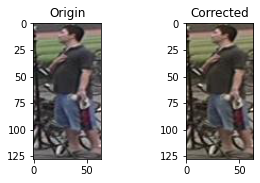

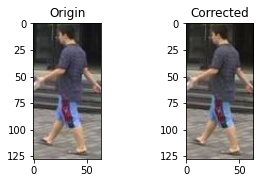

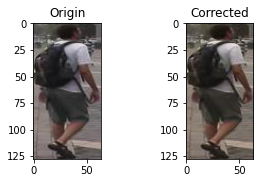

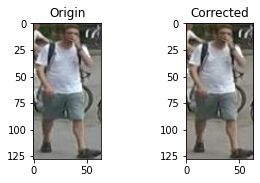

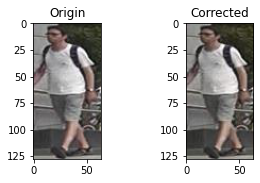

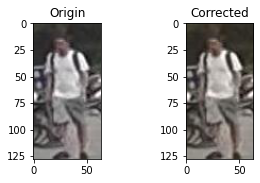

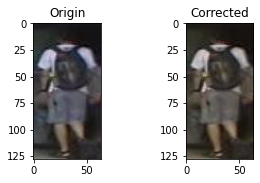

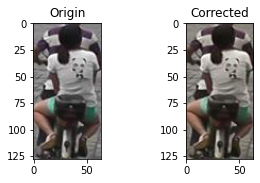

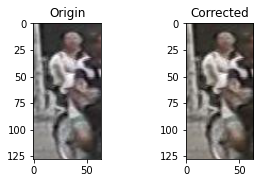

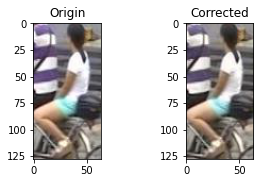

In [7]:
imgs = os.listdir(subdirs[1])
n = len(imgs)

for i in range(20, 30):
    name = imgs[i]
    origin = imread(os.path.join(subdirs[1], name))
    corrected = imread(os.path.join(subdirs[3], name))
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1,2,1), plt.imshow(origin), plt.title("Origin")
    plt.subplot(1,2,2), plt.imshow(corrected), plt.title("Corrected")
    plt.show()